## Title :
Feed-Forward Neural Networks vs Convolution Neural Networks

## Description :
The aim of this exercise is to train a feed-forward neural network and a convolutional neural network and compare the number of parameters between them on the following image classification task

<img src="../fig/fig1.png" style="width: 500px;">

## Instructions:

- Since we have only one 'Pavlos' and one 'Not Pavlos' image, we will need to augment our dataset. We use an image generator to create 'translated' versions of our two images. The training is performed on these translated images given in the data folder.

- Feed-Forward Neural Network:
    - Build a simple Feed-Forward Neural Network and compile the model with binary cross entropy as the loss. 
    - Fit the model on the training data and save the history.
    - Predict on the entire data. 
    - Visualize the loss and accuracy on train and validation data with respect to the epochs.

- Convolutional Neural Network:
    - Build a Convolution Neural Networks and compile the model with binary cross-entropy as the loss.  
    - Fit the model on the training data and save the history.
    - Predict on the entire data. 
    - Visualize the loss and accuracy on train and validation data with respect to the epochs.

- Compare the accuracy and the number of parameters of both the models.

## Hints: 

<a href="https://keras.io/guides/sequential_model/" target="_blank">keras.Sequential()</a>Creates a sequential model. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

<a href="https://keras.io/api/models/model_training_apis/#compile-method" target="_blank">keras.compile()</a>Configures the model for training.

<a href="https://keras.io/api/models/model_training_apis/#fit-method" target="_blank">keras.fit()</a>Trains the model for a fixed number of epochs.

<a href="https://keras.io/guides/training_with_built_in_methods/" target="_blank">history.history[]</a>The returned "history" object from model.fit() holds a dictionary of the loss values and metric values during training.

<a href="https://keras.io/api/models/model_training_apis/#evaluate-method" target="_blank">keras.evaluate()</a>Returns the loss value & metrics values for the model in test mode.

<a href="https://keras.io/api/preprocessing/image/#imagedatagenerator-class" target="_blank">tf.keras.preprocessing.image.ImageDataGenerator()</a>Generate batches of tensor image data with real-time data augmentation. This function is used in our helper code. 

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten" target="_blank">tf.keras.layers.Flatten()</a>Flattens the input. Does not affect the batch size.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D" target="_blank">tf.keras.layers.Conv2D()</a>2D convolution layer (e.g. spatial convolution over images).

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense" target="_blank">tf.keras.layers.Dense()</a>A regular densely-connected NN layer.


NOTE - The accuracy testing is done on the original network. Ensure to reset to the original parameters after answering the pause and think questions to pass the tests.

## Image Classification: FFNN vs CNN

In [19]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator 
from PIL import Image
from numpy import asarray
from helper import plot_history

In [28]:
# Initialise an image generator object
generator = ImageDataGenerator(rescale=1./255)
# rescale the pixel values of input images
# It involves adjusting the pixel values by dividing them by a specified factor, typically to bring them within a desired range. 
# The most common form of rescaling is dividing the pixel values by 255, which normalizes the values to the range of [0, 1]

# Initialising number of data images
num_data = len(os.listdir('../data/pavlos') + os.listdir('../data/not_pavlos'))

# Read the image data from the directory using the generator object
img_generator = generator.flow_from_directory(directory="../data/", color_mode='rgb', seed=1,
                                    batch_size=16, target_size=(150, 150), class_mode='binary')
# It is used for loading and preprocessing image data from a directory structure. 
# Determines the type of label arrays that are returned:
# "categorical" will be 2D one-hot encoded labels,
# "binary" will be 1D binary labels, "sparse" will be 1D integer labels
# return A DirectoryIterator yielding tuples of (x, y) 
# where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels. 

# Print the target size i.e. the total dataset size
TARGET_SIZE = img_generator.target_size
print(f'Generator produces images of size {TARGET_SIZE} (with 3 color channels)')

# Print the batch size
BATCH_SIZE = img_generator.batch_size
print(f'Images are generated in batches of size {BATCH_SIZE}')


Found 100 images belonging to 2 classes.
Generator produces images of size (150, 150) (with 3 color channels)
Images are generated in batches of size 16


In [34]:
for i in img_generator.next():
    print(i)

[[[[0.40784317 0.34509805 0.28235295]
   [0.41960788 0.35686275 0.29411766]
   [0.42352945 0.36078432 0.29803923]
   ...
   [0.7843138  0.627451   0.6313726 ]
   [0.7803922  0.62352943 0.627451  ]
   [0.7803922  0.62352943 0.627451  ]]

  [[0.40784317 0.34509805 0.28235295]
   [0.4156863  0.3529412  0.2901961 ]
   [0.42352945 0.36078432 0.29803923]
   ...
   [0.7843138  0.627451   0.6313726 ]
   [0.7803922  0.62352943 0.627451  ]
   [0.7803922  0.62352943 0.627451  ]]

  [[0.4039216  0.34117648 0.2784314 ]
   [0.4156863  0.3529412  0.2901961 ]
   [0.41960788 0.35686275 0.29411766]
   ...
   [0.7843138  0.627451   0.627451  ]
   [0.7843138  0.627451   0.627451  ]
   [0.7843138  0.627451   0.627451  ]]

  ...

  [[0.6509804  0.63529414 0.6392157 ]
   [0.65882355 0.6431373  0.64705884]
   [0.6627451  0.64705884 0.6509804 ]
   ...
   [0.86274517 0.7725491  0.6509804 ]
   [0.8588236  0.7686275  0.64705884]
   [0.8588236  0.7686275  0.64705884]]

  [[0.65882355 0.6431373  0.64705884]
   [0.6

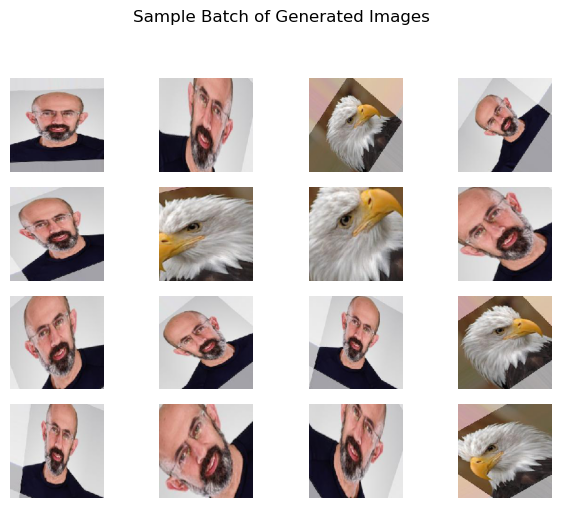

In [23]:
# Plotting a sample of the generated images 
sample_batch = img_generator.next()[0]
fig, ax = plt.subplots(4,4)
ax = ax.ravel()
for i, img in enumerate(sample_batch):
    ax[i].set_axis_off()
    ax[i].imshow(img)
    # !!!!!!!!!
plt.suptitle('Sample Batch of Generated Images', y=1.05)
# The y location of the text in figure coordinates.
plt.tight_layout()

### Feed-Forward Neural Network

Our first network will be a feed-forward neural network. The only layers with learned parameters we will be using are dense layers.

In [35]:
# Fixing the random seed
seed(1)
tf.random.set_seed(1)

# Creating a feed-forward Neural Network
FFNN = Sequential()
# a tensor refers to a multi-dimensional array or a mathematical object that can represent scalar values, vectors, matrices, and higher-dimensional arrays. 
# You can use keras.Sequential() when:
# You have a model architecture that can be represented as a sequential stack of layers. This means that the output of one layer serves as the input to the next layer in a sequential manner.
# You do not have complex connectivity patterns or skip connections between layers. The Sequential model does not support models with multiple inputs or outputs, or models with shared layers or branches.
# You are building models primarily with dense (fully connected) layers or layers that operate on a single input tensor sequentially, such as convolutional layers followed by pooling layers.

# Specify a layer that takes the input with input shape
# the same as the size of the image defined during image generation
# Remember to take into account that the image has 3 channels
FFNN.add(tf.keras.layers.Input(shape=(150,150, 3)))

# Add a flatten layer to enable FFNN to process images
FFNN.add(tf.keras.layers.Flatten())

# Specify a list of the number of nodes for each dense layer
ffnn_filters = [6,4,2]

# Add dense layers for the number of nodes in ffnn_filters with ReLU activation
for n_nodes in ffnn_filters:
    FFNN.add(tf.keras.layers.Dense(n_nodes, activation='relu'))

# Add the final dense layer with 1 output node to differentiate 
# between the two classes and sigmoid activation
FFNN.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with bce as the loss, accuracy as the metric and adam optimizer
FFNN.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

2023-07-18 14:54:36.436964: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [36]:
# Print a summary of the model and observe the total number of parameters
FFNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 6)                 405006    
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 405,047
Trainable params: 405,047
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the model
FFNN_history = FFNN.fit(
        img_generator,
        steps_per_epoch=num_data// BATCH_SIZE,
        # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. 
        epochs=10, shuffle=False, workers=0,
        # specify the number of worker processes for data loading and preprocessing during model training.
        # It is particularly relevant when dealing with large datasets that require parallel processing to efficiently load and preprocess the data.
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)
#  Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

Epoch 1/10


2023-07-18 15:04:39.632249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6/6 [==============================] - 1s 66ms/step - loss: 4.0471 - accuracy: 0.5521 - val_loss: 0.6936 - val_accuracy: 0.3125
Epoch 2/10
1/6 [====>.........................] - ETA: 0s - loss: 0.6936 - accuracy: 0.3125

2023-07-18 15:04:40.400685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6/6 [==============================] - 0s 43ms/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6940 - val_accuracy: 0.3125
Epoch 3/10
6/6 [==============================] - 0s 43ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 0s 44ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4375
Epoch 5/10
6/6 [==============================] - 0s 44ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4375
Epoch 6/10
6/6 [==============================] - 0s 43ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6928 - val_accuracy: 0.5625
Epoch 7/10
6/6 [==============================] - 0s 46ms/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6923 - val_accuracy: 0.6250
Epoch 8/10
6/6 [==============================] - 0s 40ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6936 - val_accuracy: 0.4375
Epoch 9/10
6/6 [======================

### ⏸ Enter the number of parameters in the given FFNN architecture.

In [ ]:
### edTest(test_chow1) ###

# Enter the answer by typing in a number in the space provided
answer1 = '405,047'

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

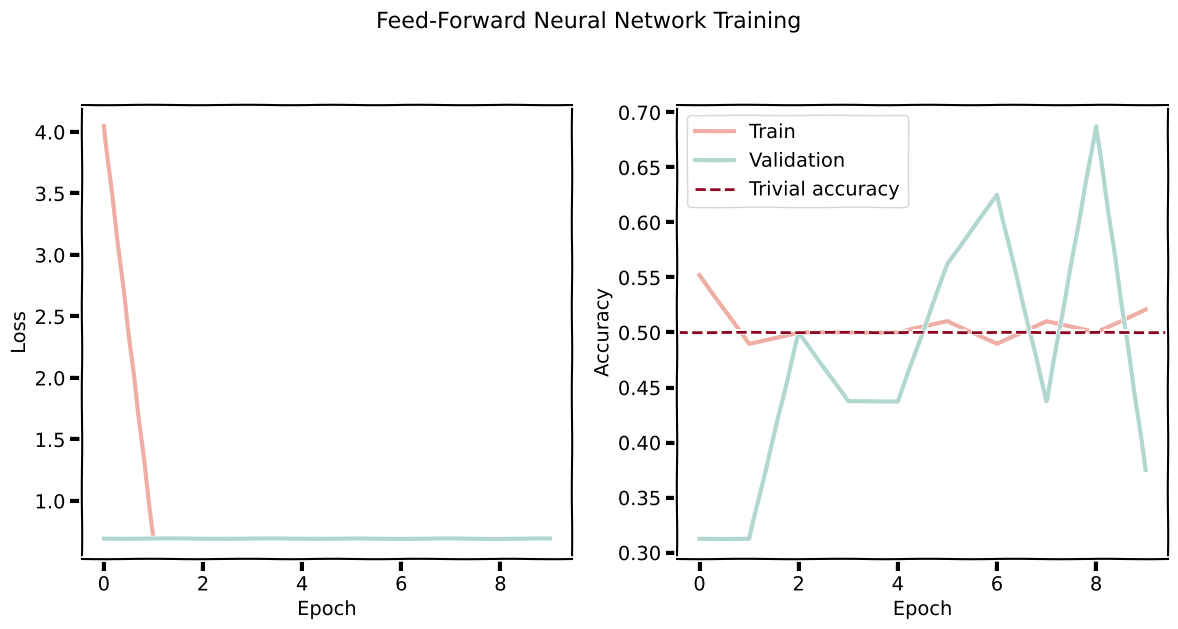

In [40]:
# Use the plot history function from the helper file to plot the data
plot_history(FFNN_history, 'Feed-Forward Neural Network')

In [39]:
### edTest(test_ffnn_acc) ###

# Evaluate your model
FFNN_loss, FFNN_acc = FFNN.evaluate(img_generator, steps=2)
# Total number of steps (batches of samples) before declaring the evaluation round finished.
print(f'FFNN Accuracy: {FFNN_acc}')

2/2 [==============================] - 0s 24ms/step - loss: 0.6938 - accuracy: 0.4062
FFNN Accuracy: 0.40625


2023-07-18 15:05:28.115055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


### ⏸ Alter the network architecture by increasing the number of nodes and/or layers. Enter the number of parameters of the network that gives a validation accuracy of above 80%.

In [ ]:
### edTest(test_chow2) ###

# Enter the answer by typing in a number in the space provided
answer2 = '405,047'

### Convolutional Neural Network

In [41]:
### edTest(test_cnn_count_param) ###

# Fixing the random seed
seed(1)
tf.random.set_seed(1)

# Creating a CNN
CNN = Sequential()

# Add a layer to take the input with shape (150,150,3)
CNN.add(Input(shape=(150, 150, 3)))

# Specify a list of the number of filters for each convolutional layer
cnn_filters = [8,8,8,8,8]

# Add convolutional layers with number of filters in cnn_filters
# with kernel size as 3, stride of 2 and relu activation
for n_filters in cnn_filters:
    CNN.add(Conv2D(n_filters,strides=(2, 2), kernel_size=3, activation='relu'))
    # strides: specifying the strides of the convolution along the height and width. 
    # kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. 
    # Can be a single integer to specify the same value for all spatial dimensions. 
    # default padding='valid', "valid" means no padding


# Add the flatten layer between the CNN and dense layer
CNN.add(Flatten())

# Add a dense layer with 64 nodes and relu activation
CNN.add(Dense(64, activation='relu'))
 
# Specify the output layer with sigmoid activation and one node
CNN.add(Dense(1, activation='sigmoid'))
 
# Compile the model with bce as the loss, accuracy as the metric and adam optimizer
CNN.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [42]:
# Print a summary of the model and observe the total number of parameters
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 74, 74, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 8)         584       
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 8)         584       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 8)           584       
                                                                 
 flatten_1 (Flatten)         (None, 72)                0         
                                                                 
 dense_4 (Dense)             (None, 64)               

### ⏸ Enter the number of parameters in the given CNN architecture.


In [ ]:
### edTest(test_chow3) ###

# Enter the answer by typing in a number in the space provided
answer3 = '7,297'

In [43]:
# Fit the model on the image generator
CNN_history = CNN.fit(
        img_generator,
        steps_per_epoch=num_data // BATCH_SIZE,
        epochs=10, shuffle=False, workers=0,
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)

Epoch 1/10


2023-07-18 16:02:20.881069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6/6 [==============================] - 2s 213ms/step - loss: 0.6903 - accuracy: 0.5000 - val_loss: 0.6809 - val_accuracy: 0.5000


2023-07-18 16:02:22.726321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 2/10
6/6 [==============================] - 1s 212ms/step - loss: 0.6756 - accuracy: 0.5729 - val_loss: 0.6468 - val_accuracy: 0.6875
Epoch 3/10
6/6 [==============================] - 1s 213ms/step - loss: 0.6466 - accuracy: 0.8125 - val_loss: 0.6279 - val_accuracy: 0.8125
Epoch 4/10
6/6 [==============================] - 1s 200ms/step - loss: 0.5864 - accuracy: 0.8854 - val_loss: 0.5295 - val_accuracy: 0.9375
Epoch 5/10
6/6 [==============================] - 1s 196ms/step - loss: 0.4642 - accuracy: 0.8854 - val_loss: 0.3182 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 1s 184ms/step - loss: 0.2969 - accuracy: 0.9583 - val_loss: 0.2258 - val_accuracy: 0.9375
Epoch 7/10
6/6 [==============================] - 1s 205ms/step - loss: 0.1549 - accuracy: 0.9271 - val_loss: 0.1238 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 1s 224ms/step - loss: 0.0636 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9375
Epoch 9/10
6/6 [====

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

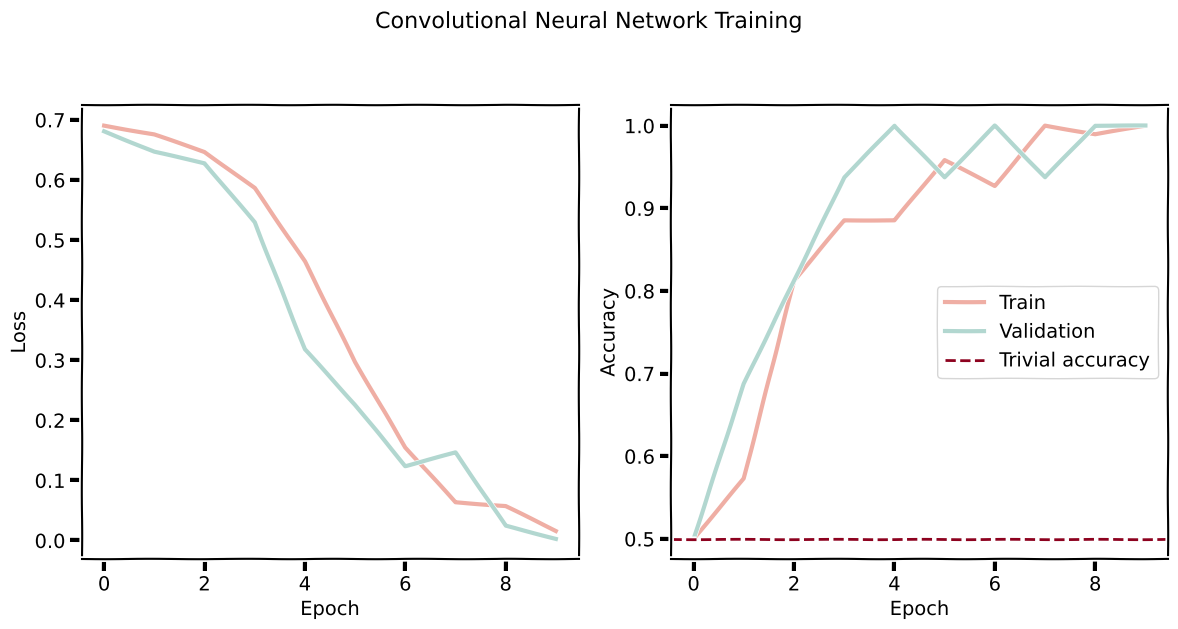

In [44]:
# Plot the history of the model
plot_history(CNN_history, 'Convolutional Neural Network')

In [45]:
### edTest(test_cnn_acc) ###

# Evaluate the model on the entire data
CNN_loss, CNN_acc = CNN.evaluate(img_generator, steps=2)
print(f'CNN Test Accuracy: {CNN_acc}')

2/2 [==============================] - 0s 18ms/step - loss: 0.0041 - accuracy: 1.0000
CNN Test Accuracy: 1.0


2023-07-18 16:17:12.543945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


### ⏸ Remove the last convolution layer in the Convolution Neural Network defined above. How does this affect the number of parameters?

#### A. The number of parameters decrease.
#### B. The number of parameters increase.
#### C. The number of parameters remains the same. 


In [ ]:
### edTest(test_chow4) ###

# Enter the answer by typing in a number in the space provided
answer4 = 'A'